http://mccormickml.com/2019/05/14/BERT-word-embeddings-tutorial/

In [107]:
from transformers import AutoTokenizer, AutoModel
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [40]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-chinese')
model = AutoModel.from_pretrained('bert-base-chinese',output_hidden_states=True)

Some weights of the model checkpoint at bert-base-chinese were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [84]:
text = "多唔多人琴日追1299 aia。這隻野好難玩 10年唔鬱 一鬱就幾年升幅行曬 🤮"

tokens = tokenizer.tokenize(text)
print(tokens)

['多', '唔', '多', '人', '琴', '日', '追', '129', '##9', 'ai', '##a', '。', '這', '隻', '野', '好', '難', '玩', '10', '年', '唔', '鬱', '一', '鬱', '就', '幾', '年', '升', '幅', '行', '曬', '[UNK]']


In [85]:
indexed_tokens = tokenizer.convert_tokens_to_ids(tokens)
print(indexed_tokens)

[1914, 1540, 1914, 782, 4433, 3189, 6841, 8990, 8160, 8578, 8139, 511, 6857, 7407, 7029, 1962, 7432, 4381, 8108, 2399, 1540, 7786, 671, 7786, 2218, 2407, 2399, 1285, 2388, 6121, 3287, 100]


In [86]:
for token in indexed_tokens:
    print(tokenizer.convert_ids_to_tokens(token))

print(tokenizer.convert_tokens_to_string(tokens))

多
唔
多
人
琴
日
追
129
##9
ai
##a
。
這
隻
野
好
難
玩
10
年
唔
鬱
一
鬱
就
幾
年
升
幅
行
曬
[UNK]
多 唔 多 人 琴 日 追 1299 aia 。 這 隻 野 好 難 玩 10 年 唔 鬱 一 鬱 就 幾 年 升 幅 行 曬 [UNK]


In [87]:
tokens = tokenizer(text,return_tensors='pt',max_length=80,truncation=True,pad_to_max_length=True)
print(tokens)

Ignored unknown kwarg option direction
{'input_ids': tensor([[ 101, 1914, 1540, 1914,  782, 4433, 3189, 6841, 8990, 8160, 8578, 8139,
          511, 6857, 7407, 7029, 1962, 7432, 4381, 8108, 2399, 1540, 7786,  671,
         7786, 2218, 2407, 2399, 1285, 2388, 6121, 3287,  100,  102,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     

/Users/rso/Applications/miniforge3/envs/nlp/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2251: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [88]:
outputs = model(**tokens)
hidden_states = outputs[2]
print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
layer_i = 0

print ("Number of batches:", len(hidden_states[layer_i]))
batch_i = 0

print ("Number of tokens:", len(hidden_states[layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(hidden_states[layer_i][batch_i][token_i]))

Number of layers: 13   (initial embeddings + 12 BERT layers)
Number of batches: 1
Number of tokens: 80
Number of hidden units: 768


In [117]:
sentences = ['我琴日去咗行街','彈琴係我嘅興趣','我琴日去咗行街']

tokens = tokenizer(sentences,return_tensors='pt')
print(tokens.input_ids)
outputs = model(**tokens)
hidden_states = outputs[2]   # 13 x 3 x len(sentence) x 768
    

tensor([[ 101, 2769, 4433, 3189, 1343, 1477, 6121, 6125,  102],
        [ 101, 2492, 4433,  913, 2769, 1646, 5646, 6637,  102],
        [ 101, 2769, 4433, 3189, 1343, 1477, 6121, 6125,  102]])


In [124]:
def idx(tokens,x):
    X = tokenizer.convert_ids_to_tokens(tokens)
    return X.index(x)

print(idx(tokens.input_ids[0],'琴'))
print(idx(tokens.input_ids[1],'琴'))

layer_i = 12
sentence_1 = 0
sentence_2 = 1
sentence_3 = 2
embeddings_1 = hidden_states[layer_i][sentence_1][idx(tokens.input_ids[sentence_1],'琴')]
embeddings_2 = hidden_states[layer_i][sentence_2][idx(tokens.input_ids[sentence_2],'琴')]
embeddings_3 = hidden_states[layer_i][sentence_3][idx(tokens.input_ids[sentence_3],'琴')]

2
2


In [132]:
print(list(embeddings_1.detach().numpy()) == list(embeddings_3.detach().numpy()))
print(list(embeddings_1.detach().numpy()) == list(embeddings_2.detach().numpy()))

True
False


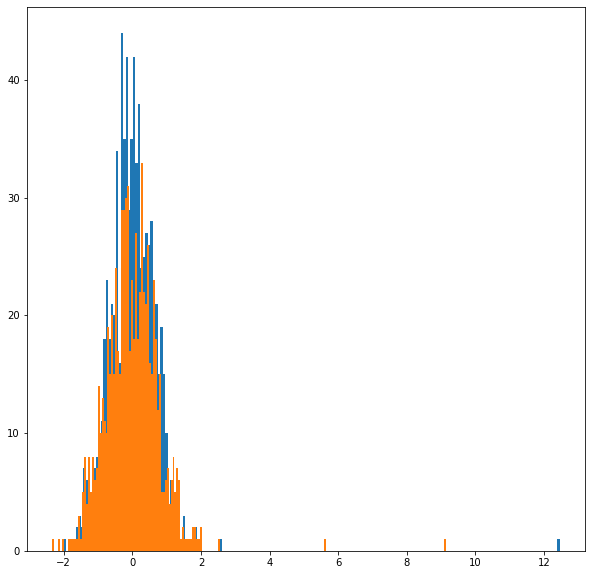

In [134]:
plt.figure(figsize=(10,10))
plt.hist(embeddings_1.detach().numpy(), bins=200)
plt.hist(embeddings_2.detach().numpy(), bins=200)
# plt.hist(embeddings_3.detach().numpy(), bins=200)
plt.show()